In [1]:
from dscribe.descriptors import SineMatrix

# Setting up the sine matrix descriptor
sm = SineMatrix(
    n_atoms_max=6,
    permutation="sorted_l2",
    sparse=False
)

In [3]:
from ase.build import bulk

# NaCl crystal created as an ASE.Atoms
nacl = bulk("NaCl", "rocksalt", a=5.64)
print(sm.get_number_of_features())
# Create output for the system
nacl_sine = sm.create(nacl)

print(nacl_sine)
print(sm.unflatten(nacl_sine))

36
[448.79438598  19.1426419    0.           0.           0.
   0.          19.1426419  157.87466743   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.        ]
[[448.79438598  19.1426419    0.           0.           0.
    0.        ]
 [ 19.1426419  157.87466743   0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.        ]]


In [8]:
nacl.cell

Cell([[0.0, 2.82, 2.82], [2.82, 0.0, 2.82], [2.82, 2.82, 0.0]])

In [9]:
nacl = bulk("NaCl", "rocksalt", a=5.64,cubic=True)
nacl.cell

Cell([5.64, 5.64, 5.64])

In [7]:
# Create output for multiple system
al = bulk("Al", "fcc", a=4.046)
fe = bulk("Fe", "bcc", a=2.856)
samples = [nacl, al, fe]
sine_matrices = sm.create(samples)            # Serial
print(samples)
print(sine_matrices)

[Atoms(symbols='NaCl', pbc=True, cell=[[0.0, 2.82, 2.82], [2.82, 0.0, 2.82], [2.82, 2.82, 0.0]]), Atoms(symbols='Al', pbc=True, cell=[[0.0, 2.023, 2.023], [2.023, 0.0, 2.023], [2.023, 2.023, 0.0]]), Atoms(symbols='Fe', pbc=True, cell=[[-1.428, 1.428, 1.428], [1.428, -1.428, 1.428], [1.428, 1.428, -1.428]])]
[[ 448.79438598   19.1426419     0.            0.            0.
     0.           19.1426419   157.87466743    0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [ 235.74041833    0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0

In [23]:
sine_matrices = sm.create(samples, n_jobs=2)  # Parallel

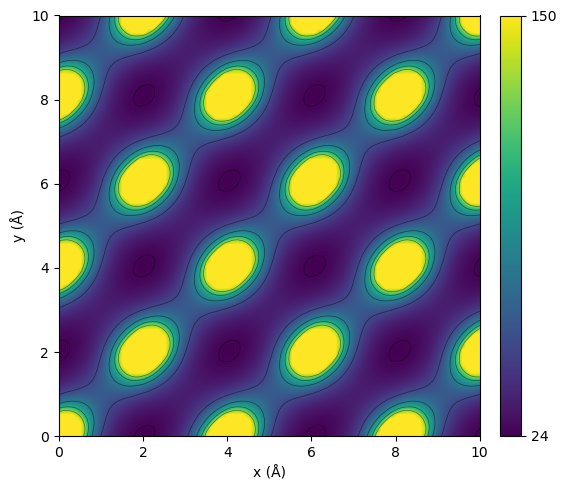

In [24]:
import numpy as np
from ase import Atoms
import matplotlib.pyplot as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

# FCC aluminum crystal
system = bulk("Al", "fcc", cubic=False)

# Calculate the sine matrix entries for a 2D slice at z=0
sm = SineMatrix(
    n_atoms_max=2,
    permutation="none",
    sparse=False
)
n = 100
d = 10
grid = np.zeros((n, n))
values = np.linspace(0, d, n)
for ix, x in enumerate(values):
    for iy, y in enumerate(values):
        i_atom = Atoms(["Al"], positions=[[x, y, 0]])
        i_sys = system.copy()+i_atom
        i_sm = sm.create(i_sys)
        i_sm = sm.unflatten(i_sm)
        i_sm = i_sm[0, 1]
        grid[ix, iy] = i_sm

# Plot the resulting sine matrix values
maxval = 150
fig, ax = mpl.subplots(figsize=(6, 5))
np.clip(grid, a_min=None, a_max=maxval, out=grid)
c1 = ax.contourf(values, values, grid, levels=500)
ax.contour(values, values, grid, levels=5, colors="k", linewidths=0.5, alpha=0.5)
the_divider = make_axes_locatable(ax)
color_axis = the_divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(c1, cax=color_axis, ticks=[grid.min(), grid.max()])
ax.axis('equal')
ax.set_ylabel("y (Å)")
ax.set_xlabel("x (Å)")
mpl.tight_layout()
mpl.show()

From the figure one can see that the sine matrix correctly encodes the periodicity of the lattice. Notice that the shape of the interaction is however not perfectly spherical.